# Разработка прототипа модели машинного обучения предсказывающей коэффициент восстановления золота из золотосодержащей руды для компании «Цифра»

Нам предстоит подготовить прототип модели машинного обучения для «Цифры».
Компания разрабатывает решения для эффективной работы промышленных предприятий.
Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды.
В нашем распоряжении данные с параметрами добычи и очистки.
Модель поможет оптимизировать производство, чтобы не запускать предприятие
с убыточными характеристиками. Для выполнения проекта нам предстоит решить задачу регрессии

# Содержание
- 1. [Подготовка данных](#title1)
-    [Коэффициент восстановления](#title2)
-    [Сравнение признаков выборок](#title3)
- 2. [Анализ данных](#title4)
-    [Распределение размера гранул](#title5)
-    [Распределение суммарной концентрации](#title6)
- 3. [Разработка модели](#title7)
-    [Модель для чернового концентрата](#title8)
-    [Модель для финального концентрата](#title9)
- 4. [Вывод](#title10)

## <a id="title1">1. Подготовка данных</a>

In [49]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.dummy import DummyRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

STATE = np.random.RandomState(11520)

df_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')
df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')

In [50]:
df_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [51]:
df_full.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,...,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19437.000000,19438.000000
mean,5.168470,9.978895,9.501224,44.076513,67.050208,9.688589,2.705795,10.583728,3.042467,144.624774,...,18.987674,-485.894516,15.010366,-461.078636,15.694452,-488.684065,12.198224,-487.149827,18.959024,-505.436305
std,1.372348,1.669240,2.787537,5.129784,10.125840,2.328642,0.949077,2.868782,0.922808,44.464071,...,5.411058,47.758570,4.890228,67.405524,5.510974,34.533396,5.333024,38.347312,5.550498,37.689057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.798523,0.000000,-800.836914,-0.372054,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,4.251240,9.137262,7.722820,43.402215,63.299712,8.062878,2.040119,8.938947,2.461138,114.107029,...,14.975734,-500.704892,11.940294,-500.187742,10.988606,-500.458467,8.971105,-500.129462,14.983037,-500.728067
50%,5.066094,10.102433,9.218961,45.011244,68.172738,9.743623,2.748730,10.622456,2.984909,143.232103,...,18.017481,-499.837793,14.971014,-499.459786,15.000036,-499.802605,11.019433,-499.935317,19.960541,-500.048400
75%,5.895527,11.035769,10.947813,46.275313,72.686642,11.134294,3.333216,12.104271,3.571351,175.075656,...,23.012470,-498.249730,19.034162,-400.118106,18.026190,-498.384187,14.019088,-499.436708,24.003170,-499.495378
max,16.001945,17.031899,19.615720,52.756638,100.000000,19.552149,5.804178,22.317730,8.245022,265.983123,...,30.115735,-245.239184,31.269706,-6.506986,43.709931,-244.483566,27.926001,-137.740004,32.188906,-104.427459


In [52]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


In [53]:
df_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [54]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [55]:
df_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [56]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

### <a id="title2">Рассчитаем коэффициент восстановления золота</a>

In [57]:
recovery = (df_train['rougher.output.concentrate_au'] * (
            df_train['rougher.input.feed_au'] - df_train['rougher.output.tail_au'])) / (
                       df_train['rougher.input.feed_au'] * (
                           df_train['rougher.output.concentrate_au'] - df_train['rougher.output.tail_au'])) * 100

In [58]:
print((round(recovery, 8) == round(df_train['rougher.output.recovery'], 8)).value_counts())
print(f"Средняя абсолютная ошибка MAE {mean_absolute_error(df_train['rougher.output.recovery'], recovery)}")

True    14149
Name: count, dtype: int64
Средняя абсолютная ошибка MAE 9.73512347450521e-15


Средняя абсолютная ошибка MAE между расчетами показателя эффективности на основе табличных данных и указанным показателем эффективности обогащения стремится к нулю ($9,73*10^{-15}$), из чего можно сделать вывод показатель эффективности в данных рассчитан верно

### <a id="title3">Сравним признаки в тестовой и обучающей выборке</a>

In [59]:
display(list(set(df_train.columns) - set(df_test.columns)))

['rougher.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'final.output.tail_au',
 'rougher.output.tail_au',
 'primary_cleaner.output.concentrate_sol',
 'final.output.concentrate_au',
 'primary_cleaner.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.concentrate_pb',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'secondary_cleaner.output.tail_au',
 'secondary_cleaner.output.tail_pb',
 'primary_cleaner.output.concentrate_ag',
 'final.output.recovery',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.output.concentrate_au',
 'primary_cleaner.output.tail_pb',
 'final.output.tail_ag',
 'primary_cleaner.output.tail_sol',
 'final.output.tail_pb',
 'rougher.output.concentrate_sol',
 'final.output.concentrate_ag',
 'secondary_cleaner.output.tail_sol',
 'rougher.output.tail_pb',
 'final.output.tail_sol',
 'secondary_cleaner.output.tail_ag',
 'rougher.output.concentrate_ag',
 'primary_cleaner.output.tail_au',
 'rougher.output.tail_ag',
 'prima

In [60]:
col = pd.Series(list(set(df_train.columns) - set(df_test.columns)))
col_dict = {}
for i in col:
    if 'rougher' in i:
        col_dict[i] = '1_rougher'
    elif 'primary_cleaner' in i:
        col_dict[i] = '2_primary_cleaner'
    elif  'secondary_cleaner' in i:
        col_dict[i] = '3_secondary_cleaner'
    elif 'final' in i:
        col_dict[i] = '4_final'
    else:
        None
col_df = pd.DataFrame.from_dict(col_dict, orient='index')
col_df = col_df.reset_index()
col_df = col_df.rename(columns={0:'stage', 'index': 'features_names'})
col_df.sort_values(by='stage')

,features_names,stage
0,rougher.output.tail_sol,1_rougher
14,rougher.calculation.floatbank11_sulfate_to_au_...,1_rougher
20,rougher.output.concentrate_sol,1_rougher
23,rougher.output.tail_pb,1_rougher
26,rougher.output.concentrate_ag,1_rougher
9,rougher.calculation.floatbank10_sulfate_to_au_...,1_rougher
15,rougher.output.concentrate_au,1_rougher
8,rougher.output.concentrate_pb,1_rougher
28,rougher.output.tail_ag,1_rougher
30,rougher.calculation.sulfate_to_au_concentrate,1_rougher


После анализа признаков недоступных в тестовой выборке видно, что это признаки относящиеся
к выходным замерам после стадий технологического процесса, либо расчетные признаки

## <a id="title4">2. Анализ данных</a>

### Подготовим данные к анализу

#### Построим визуализации концентрации металлов на различных стадиях технологического процесса

---Концентрация золота на различных стадиях технологического процесса---


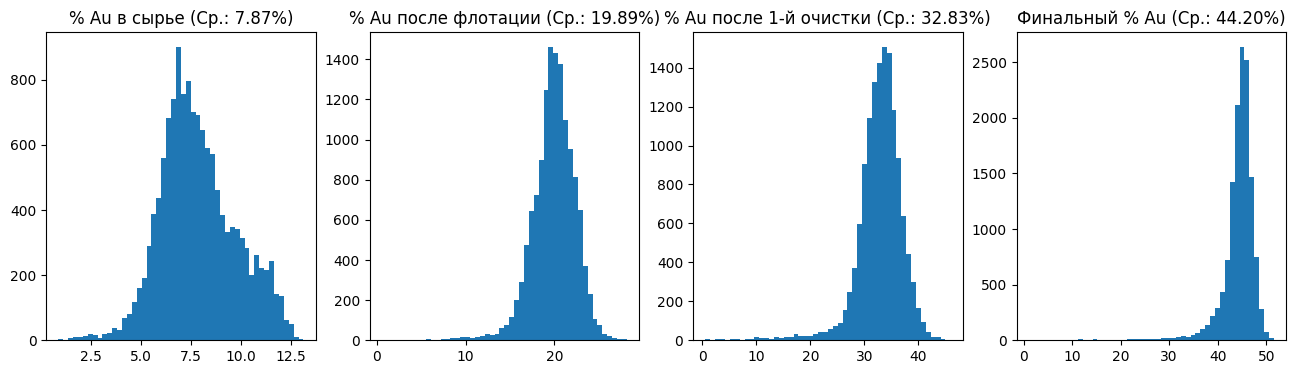

---Концентрация серебра на различных стадиях технологического процесса---


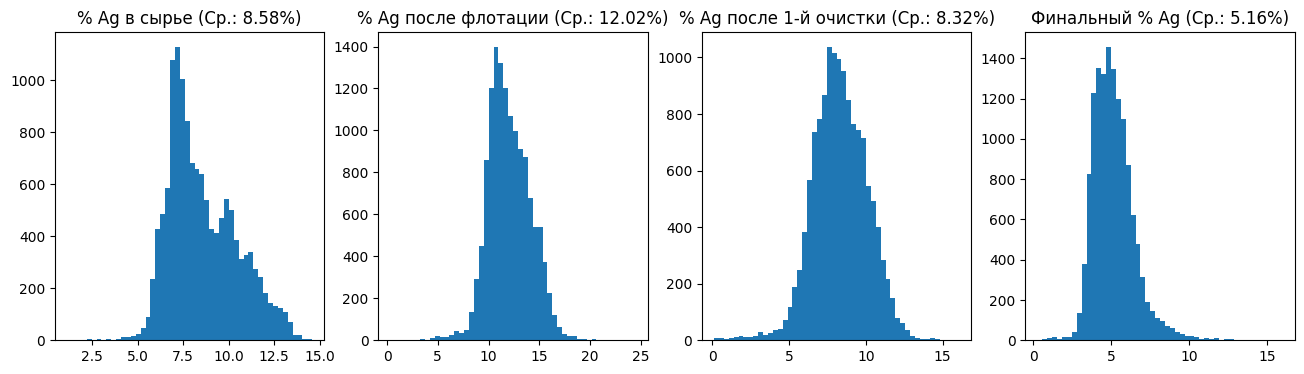

---Концентрация свинца на различных стадиях технологического процесса---


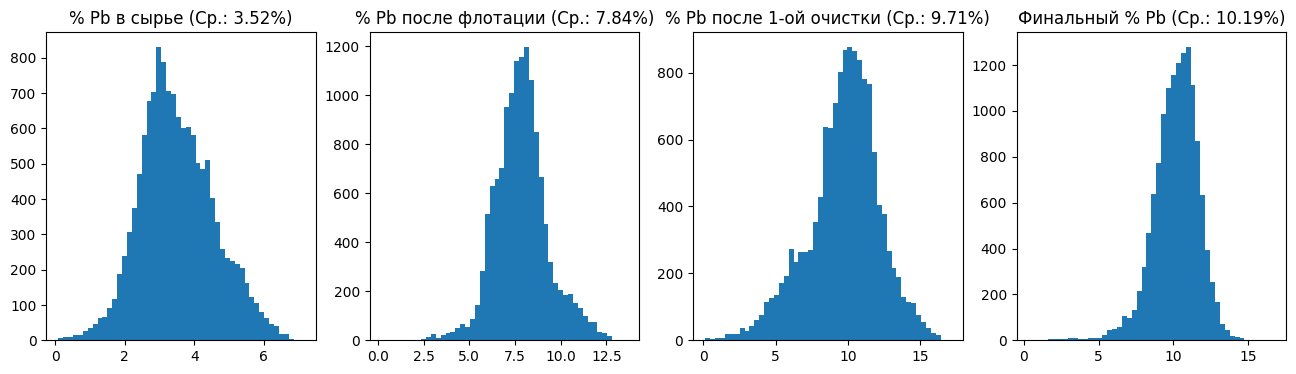

CPU times: total: 2.48 s
Wall time: 2.47 s


In [61]:
%%time

# В столбцах параметрами концентратов были замечены 0 значения, удалим их

to_drop_zero = [row for row in df_train.columns if not 'concent' in row]

drop_0 = df_train.drop(columns=to_drop_zero)

for i in drop_0.columns:
    df_train = df_train.drop(df_train[df_train[i] < 0.1].index, axis=0)

df_train.reset_index(drop=True, inplace=True)

df_train_rougher = pd.DataFrame()
df_train_primary_cleaner = pd.DataFrame()
df_train_secondary_cleaner = pd.DataFrame()
df_train_final = pd.DataFrame()

for i in df_train.columns:
    if 'rougher' in i:
        df_train_rougher[i] = df_train[i]
    elif 'primary_cleaner' in i:
        df_train_primary_cleaner[i] = df_train[i]
    elif 'secondary_cleaner' in i:
        df_train_secondary_cleaner[i] = df_train[i]
    elif 'final' in i:
        df_train_final[i] = df_train[i]
    else:
        False


print('---Концентрация золота на различных стадиях технологического процесса---')

fig_font_dict = {}

plt.figure(figsize=(16, 4))

plt.subplot(141)
plt.title(f'% Au в сырье (Cр.: {df_train_rougher["rougher.input.feed_au"].mean():.2f}%)', fontdict=fig_font_dict)
plt.hist(df_train_rougher['rougher.input.feed_au'], bins=50)
plt.subplot(142)
plt.title(f'% Au после флотации (Cр.: {df_train_rougher["rougher.output.concentrate_au"].mean():.2f}%)',
fontdict = fig_font_dict)
plt.hist(df_train_rougher['rougher.output.concentrate_au'], bins=50)
plt.subplot(143)
plt.title(
f'% Au после 1-й очистки (Cр.: {df_train_primary_cleaner["primary_cleaner.output.concentrate_au"].mean():.2f}%)',
fontdict = fig_font_dict)
plt.hist(df_train_primary_cleaner['primary_cleaner.output.concentrate_au'], bins=50)
plt.subplot(144)
plt.title(f'Финальный % Au (Cр.: {df_train_final["final.output.concentrate_au"].mean():.2f}%)', fontdict=fig_font_dict)
plt.hist(df_train_final['final.output.concentrate_au'], bins=50)

plt.show()

print('---Концентрация серебра на различных стадиях технологического процесса---')

plt.figure(figsize=(16, 4))
plt.subplot(141)
plt.title(f'% Ag в сырье (Cр.: {df_train_rougher["rougher.input.feed_ag"].mean():.2f}%)')
plt.hist(df_train_rougher['rougher.input.feed_ag'], bins=50)
plt.subplot(142)
plt.title(f'% Ag после флотации (Cр.: {df_train_rougher["rougher.output.concentrate_ag"].mean():.2f}%)')
plt.hist(df_train_rougher['rougher.output.concentrate_ag'], bins=50)
plt.subplot(143)
plt.title(
f'% Ag после 1-й очистки (Cр.: {df_train_primary_cleaner["primary_cleaner.output.concentrate_ag"].mean():.2f}%)')
plt.hist(df_train_primary_cleaner['primary_cleaner.output.concentrate_ag'], bins=50)
plt.subplot(144)
plt.title(f'Финальный % Ag (Cр.: {df_train_final["final.output.concentrate_ag"].mean():.2f}%)')
plt.hist(df_train_final['final.output.concentrate_ag'], bins=50)

plt.show()

print('---Концентрация свинца на различных стадиях технологического процесса---')

plt.figure(figsize=(16, 4))
plt.subplot(141)
plt.title(f'% Pb в сырье (Cр.: {df_train_rougher["rougher.input.feed_pb"].mean():.2f}%)')
plt.hist(df_train_rougher['rougher.input.feed_pb'], bins=50)
plt.subplot(142)
plt.title(f'% Pb после флотации (Cр.: {df_train_rougher["rougher.output.concentrate_pb"].mean():.2f}%)')
plt.hist(df_train_rougher['rougher.output.concentrate_pb'], bins=50)
plt.subplot(143)
plt.title(
f'% Pb после 1-ой очистки (Cр.: {df_train_primary_cleaner["primary_cleaner.output.concentrate_pb"].mean():.2f}%)')
plt.hist(df_train_primary_cleaner['primary_cleaner.output.concentrate_pb'], bins=50)
plt.subplot(144)
plt.title(f'Финальный % Pb (Cр.: {df_train_final["final.output.concentrate_pb"].mean():.2f}%)')
plt.hist(df_train_final['final.output.concentrate_pb'], bins=50)

plt.show()

Концентрация золота заметно растет во время прохождения сырья по этапам технологического процесса, концентрация серебра падает, а концентрация свинца незначительно растет

#### <a id="title5">Построим распределение размера гранул сырья на обучающей и тестовой выборке</a>

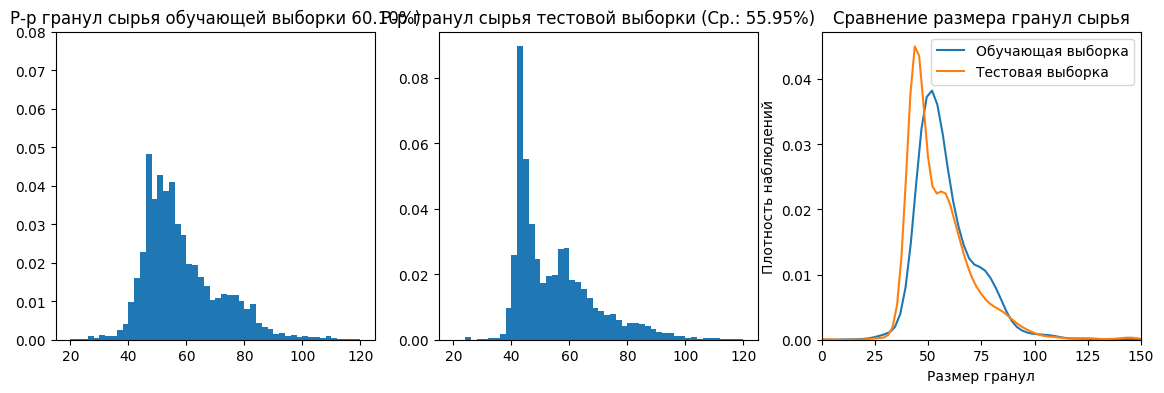

Распределение размера гранул сырья на обучающей выборке 

 count    13450.000000
mean        60.100786
std         22.577343
min          9.659576
25%         48.988908
50%         55.367120
75%         65.895001
max        484.967466
Name: rougher.input.feed_size, dtype: float64


Распределение размера гранул сырья на тестовой выборке 

 count    5289.000000
mean       55.951097
std        19.081758
min         0.046369
25%        43.906347
50%        50.841029
75%        62.431047
max       392.494040
Name: rougher.input.feed_size, dtype: float64


In [62]:
plt.figure(figsize=(14, 4))

plt.subplot(131)
plt.ylim(0, 0.08)
plt.title(f'Р-р гранул сырья обучающей выборки {df_train_rougher["rougher.input.feed_size"].mean():.2f}%)')
plt.hist(df_train_rougher['rougher.input.feed_size'], bins=50, density=True, range=(20,120))

plt.subplot(132)
plt.title(f'Р-р гранул сырья тестовой выборки (Cр.: {df_test["rougher.input.feed_size"].mean():.2f}%)')
plt.hist(df_test['rougher.input.feed_size'], bins=50, density=True, range=(20,120))

plt.subplot(133)
plt.xlim(0,150)
plt.title(f'Сравнение размера гранул сырья')
plt.ylabel('Плотность наблюдений')
plt.xlabel('Размер гранул')
sns.kdeplot(df_train_rougher['rougher.input.feed_size'], label='Обучающая выборка')
sns.kdeplot(df_test['rougher.input.feed_size'], label='Тестовая выборка')
plt.legend(loc='upper right')
plt.show()
print('Распределение размера гранул сырья на обучающей выборке', '\n\n',
      df_train_rougher["rougher.input.feed_size"].describe(), end='\n\n\n')
print('Распределение размера гранул сырья на тестовой выборке', '\n\n', df_test["rougher.input.feed_size"].describe())

Посмотрев на размер гранул сырья в обучающей и тестовой выборке можно сделать вывод, что они отличаются не значительно,
влиять на итоговые результаты это различие не должно

#### <a id="title6">Построим распределение суммарной концентрации веществ на разных стадиях технологического процесса</a>

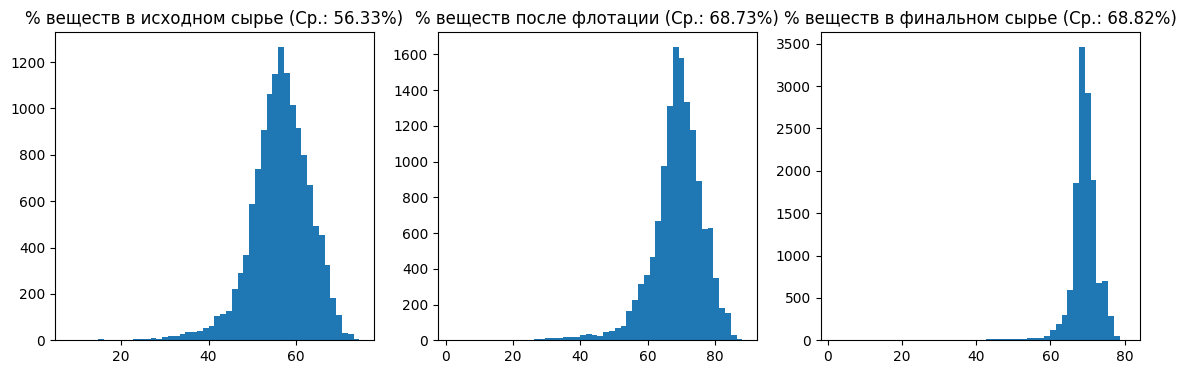

In [63]:
plt.figure(figsize=(14, 4))

plt.subplot(131)
plt.title(
    f'% веществ в исходном сырье (Cр.: {(df_train_rougher["rougher.input.feed_au"] + df_train_rougher["rougher.input.feed_ag"] + df_train_rougher["rougher.input.feed_pb"] + df_train_rougher["rougher.input.feed_sol"]).mean():.2f}%)')
plt.hist(df_train_rougher['rougher.input.feed_au'] + df_train_rougher['rougher.input.feed_ag'] + df_train_rougher[
    'rougher.input.feed_pb'] + df_train_rougher["rougher.input.feed_sol"], bins=50)

plt.subplot(132)
plt.title(
    f'% веществ после флотации (Cр.: {(df_train_rougher["rougher.output.concentrate_au"] + df_train_rougher["rougher.output.concentrate_ag"] + df_train_rougher["rougher.output.concentrate_pb"] + df_train_rougher["rougher.output.concentrate_sol"]).mean():.2f}%)')
plt.hist(df_train_rougher['rougher.output.concentrate_au'] + df_train_rougher['rougher.output.concentrate_ag'] +
         df_train_rougher['rougher.output.concentrate_pb'] + df_train_rougher["rougher.output.concentrate_sol"],
         bins=50)

plt.subplot(133)
plt.title(
    f'% веществ в финальном сырье (Cр.: {(df_train_final["final.output.concentrate_au"] + df_train_final["final.output.concentrate_ag"] + df_train_final["final.output.concentrate_pb"] + df_train_final["final.output.concentrate_sol"]).mean():.2f}%)')
plt.hist(df_train_final['final.output.concentrate_au'] + df_train_final['final.output.concentrate_ag'] + df_train_final[
    'final.output.concentrate_pb'] + df_train_final["final.output.concentrate_sol"], bins=50)

plt.show()

## <a id="title7">3. Подготовим и построим модели</a>

### Подготовим необходимые функции

In [64]:
def fill_nan(data):
    '''

    Функция по заполнению пропусков в данных на основе предыдущего известного значения признака
    '''
    for i in data.columns:
        df_index = data[data[i].isna()].index
        for x in df_index:
            data.loc[x, i] = data.loc[x - 1, i]
    return data


In [65]:
def smape(target, predictions):
    '''

    Функция расчета метрики sMAPE
    '''
    s = ((np.abs(target - predictions)) / ((np.abs(target) + np.abs(predictions)) / 2)*100).sum()
    return 1 / len(target) * s


In [66]:
def smape_final(smape_rougher, smape_final):
    '''

    Функция расчета финальной метрики sMAPE
    '''
    smape_final = (0.25 * smape_rougher + 0.75 * smape_final)
    return smape_final

### Подготовим признаки

In [67]:
# Заполним пропуски в данных

features_train = fill_nan(df_train)
features_test = fill_nan(df_test).drop(columns='date')

not_in_test = list(set(df_train.columns) - set(df_test.columns))
not_in_test.append('date')
features_train = df_train.drop(columns=not_in_test)
target_train = df_train['final.output.recovery']

print(features_train.shape)
print(target_train.shape)

to_drop = []
for i in df_test.columns:
    if 'primary_cleaner' in i:
        to_drop.append(i)
    elif 'secondary_cleaner' in i:
        to_drop.append(i)

#  Признаки для чернового сырья и финального этапа

features_rougher_train = fill_nan(df_train_rougher)
target_rougher_train = features_rougher_train['rougher.output.recovery']
features_rougher_test = fill_nan(df_test).drop(columns='date')
features_rougher_test = features_rougher_test.drop(columns=to_drop)
features_rougher_train = df_train_rougher.drop(columns=list(set(features_rougher_train) - set(features_rougher_test)))

test = fill_nan(
    df_test.merge(df_full[['rougher.output.recovery', 'final.output.recovery', 'date']], how='inner', on='date'))

target_rougher_test = test['rougher.output.recovery']
target_final_test = test['final.output.recovery']

print(target_rougher_test.shape)
print(features_rougher_test.shape)

(13588, 52)
(13588,)
(5290,)
(5290, 22)


### <a id="title8">Построим модель для чернового концентрата</a>

#### Модель линейной регрессии

In [68]:
smape_scorer = make_scorer(smape, greater_is_better=False)

model = LinearRegression()
model.fit(features_rougher_train, target_rougher_train)
predictions = model.predict(features_rougher_train)


print(f'Среднеe истинное и предсказанное {target_rougher_train.mean(), predictions.mean()}')
print(f'Среднеквадратичная ошибка {mean_squared_error(target_rougher_train, predictions, squared=False)}')
print(f'sMAPE: {smape(target_rougher_train, predictions)}')

model_score = cross_val_score(model,features_rougher_train,  target_rougher_train, cv=10, scoring=smape_scorer)

print(model_score*-1)

Среднеe истинное и предсказанное (84.52667658839083, 84.52667658839081)
Среднеквадратичная ошибка 5.7446420314450375
sMAPE: 5.0780915503390816
[6.28670833 8.82865385 7.04289715 6.87990862 5.05691915 4.17470958
 5.29728338 4.13265868 6.3269587  6.33120687]


#### Модель Случайного леса

In [69]:
%%time
# Построим модель случайного леса чернового концентрата

smape_scorer = make_scorer(smape, greater_is_better=False)

grid_space = {'max_depth': [8, 10, 12],
              'n_estimators': [100, 120],
              'max_features': ['sqrt', 'log2'],
              'min_samples_leaf': [3],
              'min_samples_split': [5],
              'random_state': [STATE],
              'verbose': [0],
              'n_jobs': [-1]
              }

model = RandomForestRegressor()
grid = GridSearchCV(model, param_grid=grid_space, cv=3, scoring=smape_scorer)

model_grid = grid.fit(features_rougher_train, target_rougher_train)
display(model_grid.best_params_)
display(model_grid.best_score_)

model = RandomForestRegressor(max_depth=8, max_features='sqrt', min_samples_leaf=3,
                              min_samples_split=5, n_estimators=120, n_jobs=-1, random_state=STATE)

model.fit(features_rougher_train, target_rougher_train)
predictions = model.predict(features_rougher_train)

print(f'sMAPE: {smape(target_rougher_train, predictions)}')

dummy = DummyRegressor()
dummy.fit(features_rougher_train, target_rougher_train)
dummy_predictions = dummy.predict(features_rougher_train)

print(f'Dummy sMAPE: {smape(target_rougher_train, dummy_predictions)}')

print(f'Среднеe истинное и предсказанное {target_rougher_train.mean(), predictions.mean()}')
print(f'Среднеквадратичная ошибка {mean_squared_error(target_rougher_train, predictions, squared=False)}')
print(f'R2 score {r2_score(target_rougher_train, predictions)}')
print(f'Среднеквадратичная ошибка Dummy {mean_squared_error(target_rougher_train, dummy_predictions, squared=False)}')

sMAPE: 3.4628055235755624
Dummy sMAPE: 7.280800857971663
Среднеe истинное и предсказанное (84.52667658839083, 84.52614785418751)
Среднеквадратичная ошибка 4.104164629713308
R2 score 0.7290043837122129
Среднеквадратичная ошибка Dummy 7.883945989838106
CPU times: total: 8.02 s
Wall time: 803 ms


#### Модель градиентного бустинга основанного на гистограмме

In [70]:
%%time

grid_space = {'learning_rate': [0.1],
              'max_leaf_nodes': [31, 51, 71],
              'max_depth': [3, 5, 7],
              'min_samples_leaf': [20, 40, 60],
              'max_bins': [255],
              'random_state': [STATE],
              'verbose': [0]
              }

model = HistGradientBoostingRegressor()
grid = GridSearchCV(model, param_grid=grid_space, cv=3, scoring=smape_scorer)

model_grid = grid.fit(features_rougher_train, target_rougher_train)
display(model_grid.best_params_)
display(model_grid.best_score_)

model = HistGradientBoostingRegressor(learning_rate=0.1, max_depth=3, max_leaf_nodes=31, min_samples_leaf=60,
                                      max_bins=255, verbose=0, random_state=STATE)

model.fit(features_rougher_train, target_rougher_train)
predictions = model.predict(features_rougher_train)
predictions_test = model.predict(features_rougher_test)

print(f'sMAPE: {smape(target_rougher_train, predictions)}')

dummy = DummyRegressor()
dummy.fit(features_rougher_train, target_rougher_train)
dummy_predictions = dummy.predict(features_rougher_train)

print(f'Dummy sMAPE: {smape(target_rougher_train, dummy_predictions)}')

print(f'Среднеe истинное и предсказанное {target_rougher_train.mean(), predictions.mean()}')
print(f'Среднеквадратичная ошибка {mean_squared_error(target_rougher_train, predictions, squared=False)}')
print(f'R2 score {r2_score(target_rougher_train, predictions)}')
print(f'Среднеквадратичная ошибка Dummy {mean_squared_error(target_rougher_train, dummy_predictions, squared=False)}')
smape_rougher_test = smape(target_rougher_test, predictions_test)
print(f'sMAPE на тестовой выборке: {smape_rougher_test}')

sMAPE: 3.6933430137192724
Dummy sMAPE: 7.280800857971663
Среднеe истинное и предсказанное (84.52667658839083, 84.49970295149146)
Среднеквадратичная ошибка 4.386137003008568
R2 score 0.690488275478663
Среднеквадратичная ошибка Dummy 7.883945989838106
sMAPE на тестовой выборке: 7.477453398764079
CPU times: total: 2.55 s
Wall time: 284 ms


### <a id="title9">Модель для финального концентрата</a>

#### Модель Случайного Леса

In [71]:
%%time

smape_scorer = make_scorer(smape, greater_is_better=False)

grid_space = {'max_depth': [6, 8, 10],
              'n_estimators': [100, 120, 140, 160],
              'max_features': ['sqrt', 'log2'],
              'min_samples_leaf': [3, 5],
              'min_samples_split': [3, 5],
              'random_state': [STATE],
              'verbose': [1],
              'n_jobs': [-1]
              }

model = RandomForestRegressor()
grid = GridSearchCV(model, param_grid=grid_space, cv=5, scoring=smape_scorer)

model_grid = grid.fit(features_train, target_train)

display(model_grid.best_params_)
display(model_grid.best_score_)

model = RandomForestRegressor(max_depth=6, n_estimators=140, max_features='sqrt', min_samples_leaf=3,
                              min_samples_split=3, random_state=STATE, n_jobs=-1)
model.fit(features_train, target_train)
predictions = model.predict(features_train)

print(f'sMAPE: {smape(target_train, predictions)}')

dummy = DummyRegressor()
dummy.fit(features_train, target_train)
dummy_predictions = dummy.predict(features_train)
print(f'Dummy sMAPE: {smape(target_train, dummy_predictions)}')

print(f'Среднеe истинное и предсказанное {target_train.mean(), predictions.mean()}')
print(f'Среднеквадратичная ошибка {mean_squared_error(target_train, predictions, squared=False)}')
print(f'R2 score {r2_score(target_train, predictions)}')
print(f'Среднеквадратичная ошибка Dummy {mean_squared_error(target_train, dummy_predictions, squared=False)}')

sMAPE: 6.863112688139012
Dummy sMAPE: 10.029924921696828
Среднеe истинное и предсказанное (66.81880125847407, 66.82692864143978)
Среднеквадратичная ошибка 6.403750279727231
R2 score 0.5038844459486989
Среднеквадратичная ошибка Dummy 9.091655398995611
CPU times: total: 13.3 s
Wall time: 1.29 s


#### Модель градиентного бустинга основанного на гистограмме

In [72]:
%%time

grid_space = {'learning_rate': [0.07],
              'max_leaf_nodes': [31, 51, 71],
              'max_depth': [3, 4, 5],
              'min_samples_leaf': [20, 40, 60],
              'max_bins': [255],
              'random_state': [STATE],
              'verbose': [1]
              }

model = HistGradientBoostingRegressor()
grid = GridSearchCV(model, param_grid=grid_space, cv=5, scoring=smape_scorer)

model_grid = grid.fit(features_train, target_rougher_train)
display(model_grid.best_params_)
display(model_grid.best_score_)

model = HistGradientBoostingRegressor(learning_rate=0.085, max_depth=3, max_leaf_nodes=41, min_samples_leaf=40,
                                      max_bins=255, verbose=0, random_state=STATE)

model.fit(features_train, target_train)
predictions = model.predict(features_train)
predictions_test = model.predict(features_test)

print(f'sMAPE: {smape(target_train, predictions)}')

dummy = DummyRegressor()
dummy.fit(features_train, target_train)
dummy_predictions = dummy.predict(features_train)

print(f'Dummy sMAPE: {smape(target_train, dummy_predictions)}')

print(f'Среднеe истинное и предсказанное {target_train.mean(), predictions.mean()}')
print(f'Среднеквадратичная ошибка {mean_squared_error(target_train, predictions, squared=False)}')
print(f'R2 score {r2_score(target_train, predictions)}')
print(f'Среднеквадратичная ошибка Dummy {mean_squared_error(target_train, dummy_predictions, squared=False)}')
smape_final_test = smape(target_final_test, predictions_test)
print(f'sMAPE на тестовой выборке: {smape_final_test}')

sMAPE: 6.578424449369644
Dummy sMAPE: 10.029924921696828
Среднеe истинное и предсказанное (66.81880125847407, 66.79631794683363)
Среднеквадратичная ошибка 6.198161443468112
R2 score 0.5352281291140593
Среднеквадратичная ошибка Dummy 9.091655398995611
sMAPE на тестовой выборке: 9.106439971237979
CPU times: total: 3.45 s
Wall time: 425 ms


In [73]:
print(f'Итоговая sMAPE: {smape_final(smape_rougher_test, smape_final_test):.2f} %')

Итоговая sMAPE: 8.70 %


# <a id="title10">4. Выводы</a>

Мы произвели работу по исследованию данных и построения прототипа модели машинного обучения по технологическому процессу золотодобычи для компании "Цифра". После перебора нескольких вариантов моделей проверки моделей с помощью метода кроссвалидации, лучшие метрики показали модели на основе Градиентного Бустинга как для чернового концентрата, так и для финального. Модели были проверенны на адекватность с помощью DummyRegressor. Итоговая симметричная средняя абсолютная процентная ошибка(sMAPE) составила 8,7 %